<a href="https://colab.research.google.com/github/jangdain04-lab/TA_Airpods/blob/main/TA_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/yeon524/kpop-lyrics-analytics.git
%cd kpop-lyrics-analytics


Cloning into 'kpop-lyrics-analytics'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 196 (delta 3), reused 9 (delta 3), pack-reused 185 (from 1)
Receiving objects: 100% (196/196), 41.17 MiB | 18.30 MiB/s, done.
Resolving deltas: 100% (71/71), done.
/content/kpop-lyrics-analytics


In [2]:
import pandas as pd

df = pd.read_csv("datasets/lyrics_by_year_1964_2023.csv")
df = df[(df["year"] >= 1970) & (df["year"] <= 2020)].reset_index(drop=True)


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [4]:
!pip install kiwipiepy wordcloud pandas matplotlib seaborn tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 MB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.9 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.22.0-py3-none-any.whl size=79625203 sha256=170f2215445ab98133afbf675b4db8e0d8010b96d3b36039d0f7ef222e1ee725
  Stored in directory: /root/.cache/pip/wheels/e5/4b/3f/aa850a40d0f9709fd4c6d37d48402ca95354264236e1205ea3
Successfully built kiwipiepy_model


In [5]:
from kiwipiepy import Kiwi
kiwi = Kiwi()
print("Kiwi OK")


Kiwi OK


In [6]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm.notebook import tqdm

In [7]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

In [8]:
import matplotlib as mpl
from matplotlib import rc
import matplotlib.font_manager as fm

sns.set(style="whitegrid")
sns.set_color_codes("muted")

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [9]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [10]:
raw_df = pd.read_csv('datasets/lyrics_by_year_1964_2023.csv', encoding='utf-8')
raw_df = raw_df[(raw_df["year"] >= 1970) & (raw_df["year"] <= 2020)]
df = raw_df.sort_values(by=['year', 'id']).reset_index(drop=True)
df


,id,year,title,singer,lyric,x_rated
0,54300,1970,그사람 바보야,정훈희,단 한번 윙크로 내 마음 줄까봐\n살짝쿵 윙크한 그 사람 떠났네\n다시 한번 윙크하...,False
1,452881,1970,바보같은 사나이,나훈아,사랑이 빗물되어\n말없이 흘러내릴때\n사나이는 울었다네\n빗물도 울었다네\n세월가면...,False
2,992953,1970,범띠 아가씨,양미란,가시내야 가시내야 범띠 가시내야\n사내 마음 울려놓고 싶은 범띠 가시내\n울고 가는...,False
3,1004591,1970,당신은 철새,김부자,그리우면 왔다가 싫어지면 가버리는\n당신의 이름은 무정한 철새\n진정코 내가 싫어 ...,False
4,1004596,1970,일자상서,김부자,아버님전에\n어머님전에\n눈물로 일자상서\n올리나이다\n타향객지 직장살이\n불효한 ...,False
...,...,...,...,...,...,...
4191,32871975,2020,내 마음이 움찔했던 순간 취향저격 그녀 X 규현,규현 KYUHYUN,어떤 말로 표현해야\n그대 알 수 있을까요\n어떤 맘을 담아내야만\n그대에게 전해질...,False
4192,32872978,2020,Dynamite,방탄소년단,Cos ah ah\nI’m in the stars tonight\nSo watch ...,False
4193,32961718,2020,Lovesick Girls,BLACKPINK,영원한 밤\n창문 없는 방에 우릴 가둔 love\nWhat can we say\n매...,False
4194,32978341,2020,DON'T TOUCH ME,환불원정대,Trouble 이래 다 그래\n세 보인대 어쩔래\n난 멋 부리네 더 꾸미네\nyea...,False


In [11]:
len(df['singer'].unique()), len(df['id'].unique())

(1208, 3857)

In [12]:
df.sort_values(by='title')

,id,year,title,singer,lyric,x_rated
3403,3947371,2013,물음표 Feat 최자 Of 다이나믹듀오 ZionT,프라이머리,전화를 할까 말까 문자로 할까\n아 시간이 너무 늦었나\n그녀는 벌써 잘까\n오늘따...,False
3393,3947371,2012,물음표 Feat 최자 Of 다이나믹듀오 ZionT,프라이머리,전화를 할까 말까 문자로 할까\n아 시간이 너무 늦었나\n그녀는 벌써 잘까\n오늘따...,False
1942,78184,1998,'Cause I'm Your Girl,SES,Yeah\nwhat's up what's up SES\nWe open up the ...,False
1435,56840,1993,'친구'라 말할 수 있는 건,신성우,나 어릴적 뛰놀던 놀이터에\n회색 건물이 들어서 있고\n길을 걷는 수녀의 옷자락엔\...,False
4152,32399832,2020,0000 Zero O’Clock,방탄소년단,그런 날 있잖아\n이유 없이 슬픈 날\n몸은 무겁고\n나 빼곤 모두 다\n바쁘고 치...,False
...,...,...,...,...,...,...
266,54059,1977,흰 구름 먹구름,딕 훼밀리,차라리 만나지나 말것을 만난 것도 인연인데 마지막으로 보는 당신\n\n왜 이다지도 ...,False
2797,1459456,2007,흰눈,이루,한 사람을 너무 사랑했던거죠\n얼마나 나를\n아프게 할지도 모르고\n기뻐했죠\n이 ...,False
1067,1079798,1989,히말라야,이브,NaN,False
4195,32998018,2020,힘든 건 사랑이 아니다,임창정,내가 널 떠났어야 했는데 왜 떠나야 하는지도 아는데\n어떤 아무 말도 아무것도 줄 ...,False


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       4196 non-null   int64 
 1   year     4196 non-null   int64 
 2   title    4196 non-null   object
 3   singer   4196 non-null   object
 4   lyric    4013 non-null   object
 5   x_rated  4196 non-null   bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 168.1+ KB


In [14]:
lyrics_all_df = df.copy()

In [15]:
unique_songs_all = lyrics_all_df.drop_duplicates(subset=['id'])
unique_songs_all

,id,year,title,singer,lyric,x_rated
0,54300,1970,그사람 바보야,정훈희,단 한번 윙크로 내 마음 줄까봐\n살짝쿵 윙크한 그 사람 떠났네\n다시 한번 윙크하...,False
1,452881,1970,바보같은 사나이,나훈아,사랑이 빗물되어\n말없이 흘러내릴때\n사나이는 울었다네\n빗물도 울었다네\n세월가면...,False
2,992953,1970,범띠 아가씨,양미란,가시내야 가시내야 범띠 가시내야\n사내 마음 울려놓고 싶은 범띠 가시내\n울고 가는...,False
3,1004591,1970,당신은 철새,김부자,그리우면 왔다가 싫어지면 가버리는\n당신의 이름은 무정한 철새\n진정코 내가 싫어 ...,False
4,1004596,1970,일자상서,김부자,아버님전에\n어머님전에\n눈물로 일자상서\n올리나이다\n타향객지 직장살이\n불효한 ...,False
...,...,...,...,...,...,...
4191,32871975,2020,내 마음이 움찔했던 순간 취향저격 그녀 X 규현,규현 KYUHYUN,어떤 말로 표현해야\n그대 알 수 있을까요\n어떤 맘을 담아내야만\n그대에게 전해질...,False
4192,32872978,2020,Dynamite,방탄소년단,Cos ah ah\nI’m in the stars tonight\nSo watch ...,False
4193,32961718,2020,Lovesick Girls,BLACKPINK,영원한 밤\n창문 없는 방에 우릴 가둔 love\nWhat can we say\n매...,False
4194,32978341,2020,DON'T TOUCH ME,환불원정대,Trouble 이래 다 그래\n세 보인대 어쩔래\n난 멋 부리네 더 꾸미네\nyea...,False


In [16]:
lyrics = unique_songs_all['lyric']
bar = tqdm(total=len(lyrics))
tokens_all = Counter()
for lyric in lyrics:
    if type(lyric) == str:
        tags = [f"{token.form}_{token.tag}" for token in kiwi.tokenize(lyric)]
        tokens_all += Counter(tags)
        del tags
    bar.update(1)

print(tokens_all)

  0%|          | 0/3857 [00:00<?, ?it/s]

Counter({'어_EC': 48506, '나_NP': 36352, 'ᆫ_ETM': 21841, '의_JKG': 20036, '너_NP': 19660, '이_VCP': 16872, 'ᆫ_JX': 15863, '는_ETM': 14964, '에_JKB': 14759, '고_EC': 14401, '었_EP': 14295, '이_JKS': 13883, '을_JKO': 13642, '하_XSV': 13591, 'ᆯ_ETM': 12951, '어_EF': 11907, 'ᆯ_JKO': 11664, '사랑_NNG': 10652, '가_JKS': 10595, '를_JKO': 10084, '도_JX': 9696, '지_EC': 9473, '게_EC': 8633, '하_XSA': 8520, '은_ETM': 8252, '는_JX': 8044, '거_NNB': 7774, '하_VV': 7696, '없_VA': 7189, '은_JX': 6922, '그대_NP': 6553, '만_JX': 6373, '수_NNB': 5892, '주_VX': 5610, '던_ETM': 5146, '그_MM': 5083, '말_NNG': 4954, '어도_EC': 4915, '에게_JKB': 4730, '것_NNB': 4728, '보_VX': 4665, 'I_SL': 4421, '면_EC': 4370, '않_VX': 4074, '되_VV': 4044, '어요_EF': 3990, '하_VX': 3973, '보_VV': 3881, '우리_NP': 3798, '야_EF': 3682, '들_XSN': 3608, '말_VX': 3458, '가_VV': 3324, '있_VX': 3211, '지_VX': 3200, '로_JKB': 3151, 'you_SL': 3072, '을_ETM': 3048, '어서_EC': 2962, '이_MM': 2873, '다시_MAG': 2857, "'_SS": 2852, '마음_NNG': 2838, '겠_EP': 2719, '있_VA': 2707, '사람_NNG': 2700, '더_MAG':

```py
"NNG", "NNP", "NNB", "NR", "NP", # 체언 (명사, 수사)
"VV", "VA", "VX", "VCP", "VCN",  # 용언 (동사, 형용사, 보조 용언, 지시사)
"MM", "MAG", "MAJ", # 관형사, 부사
"JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC", # 조사
"EP", "EF", "EC", "ETN", "ETM", # 어미
"XPN", "XSN", "XSV", "XSA", "XSM", "XR", # 접두사, 접미사, 어근
"SF", "SP", "SS", "SSO", "SSC", "SE", "SO", "SW", # 부호, 괄호, 특수 문자
"SL", "SH", "SN", "SB", # 알파벳, 한자, 숫자, 글머리
"UN", # 분석 불가
"W_URL", "W_EMAIL", "W_HASHTAG", "W_MENTION", "W_SERIAL", # 웹 태그
"IC", # 감탄사
"Z_CODA", # 덧붙은 받침
"USER0", "USER1", "USER2", "USER3", "USER4" # 사용자 태그
```

In [17]:
rows = []
for key, count in tokens_all.items():
    k = key.split("_")
    form, tag = k[0], '_'.join(k[1:])
    tag = tag.replace("-I", '').replace("-R", '') # 규칙/불규칙 활용 무시
    rows.append((form, tag, count))

count_df = pd.DataFrame(rows, columns=['form', 'tag', 'count'])
count_df = count_df.sort_values(by=['count', 'tag'], ascending=[False, True])
count_df['form'] = count_df['form'].apply(str.lower)

del rows

count_df

,form,tag,count
11,어,EC,48506
5,나,NP,36352
15,ᆫ,ETM,21841
6,의,JKG,20036
429,너,NP,19660
...,...,...,...
13893,산,XSN,1
15786,력,XSN,1
15959,론,XSN,1
7379,뜨리,XSV,1


In [18]:
tag_sr = count_df['tag']
is_english = tag_sr.isin(["SL"])
is_numeric = tag_sr.isin(["SN"])
is_kanji = tag_sr.isin(["SH"])
is_invalid = tag_sr.isin([
    "UN", # 분석 불가
    "W_URL", "W_EMAIL", "W_HASHTAG", "W_MENTION", "W_SERIAL", # 웹 태그
    "IC", # 감탄사
    "Z_CODA", # 덧붙은 받침
    "USER0", "USER1", "USER2", "USER3", "USER4"
])
is_alpha = tag_sr.isin([
    "NNG", "NNP", "NNB", "NR", "NP", # 체언 (명사, 수사)
    "VV", "VA", "VX", "VCP", "VCN",  # 용언 (동사, 형용사, 보조 용언, 지시사)
    "MM", "MAG", "MAJ", # 관형사, 일반 부사, 접속 부사
    "JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC", # 조사
    "EP", "EF", "EC", "ETN", "ETM", # 어미
    "XPN", "XSN", "XSV", "XSA", "XSM", "XR", # 접두사, 접미사, 어근
])
is_symbol = tag_sr.isin([
    "SF", "SP", "SS", "SSO", "SSC", "SE", "SO", "SW", # 부호, 괄호, 특수 문자
    "SB", # 글머리
    "IC", # 감탄사
])
is_noun = tag_sr.isin([
    "NNG", "NNP", "NNB", "NR", "NP", # 체언 (명사, 수사)
])
is_verb = tag_sr.isin(["VV", "VX"]) # 동사, 보조 용언
is_adjective = tag_sr.isin(["VA"]) # 형용사
is_adverbs = tag_sr.isin(["MM", "MAG", "MAJ"]) # 관형사, 일반 부사, 접속 부사
is_particle = tag_sr.isin(["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"]) # 조사

In [ ]:
count_df[is_alpha].sort_values('count', ascending=False)

,form,tag,count
8,어,EC,57050
130,나,NP,38001
48,ᆫ,ETM,22604
1,의,JKG,21206
612,너,NP,20546
...,...,...,...
11026,찬스,NNG,1
11022,완젼,NNG,1
11018,탄탄대로,NNG,1
11015,고물,NNG,1


In [19]:
count_df[is_verb].sort_values('count', ascending=False)

,form,tag,count
57,하,VV,7696
24,주,VX,5610
10,보,VX,4665
325,않,VX,4074
488,되,VV,4044
...,...,...,...
16352,댕기,VV,1
16335,돌려보내,VV,1
16233,빼닮,VV,1
16185,두리번거리,VV,1


In [20]:
count_df[is_noun].sort_values('count', ascending=False)

,form,tag,count
5,나,NP,36352
429,너,NP,19660
29,사랑,NNG,10652
515,거,NNB,7774
319,그대,NP,6553
...,...,...,...
10418,동서,NNG,1
10409,전용,NNG,1
10408,성인,NNG,1
10405,머리속,NNG,1


In [21]:
# save to csv
count_df.to_csv('lyrics_word_count_kiwi.csv', encoding='utf-8', index=False)

In [22]:
!curl https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip -o notosanskr.zip
!unzip -n notosanskr.zip -d notosanskr/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  115M  100  115M    0     0  78.1M      0  0:00:01  0:00:01 --:--:-- 78.1M
Archive:  notosanskr.zip
  inflating: notosanskr/LICENSE_OFL.txt  
  inflating: notosanskr/NotoSansCJKkr-Black.otf  
  inflating: notosanskr/NotoSansCJKkr-Bold.otf  
  inflating: notosanskr/NotoSansCJKkr-DemiLight.otf  
  inflating: notosanskr/NotoSansCJKkr-Light.otf  
  inflating: notosanskr/NotoSansCJKkr-Medium.otf  
  inflating: notosanskr/NotoSansCJKkr-Regular.otf  
  inflating: notosanskr/NotoSansCJKkr-Thin.otf  
  inflating: notosanskr/NotoSansMonoCJKkr-Bold.otf  
  inflating: notosanskr/NotoSansMonoCJKkr-Regular.otf  
  inflating: notosanskr/README       


In [23]:
count_df[is_noun | is_verb | is_adjective | is_adverbs][['form', 'count']]

,form,count
5,나,36352
429,너,19660
29,사랑,10652
515,거,7774
57,하,7696
...,...,...
8737,블,1
10597,허,1
11895,되,1
12971,갖,1


In [24]:
def get_words_counts(df) -> dict:
    d = df[['form', 'count']]
    d.index = d['form']
    d = d.drop(['form'], axis=1)
    return d.to_dict()['count']

In [25]:
from wordcloud import WordCloud

fonts_dir = "notosanskr"
fonts = list(filter(lambda f: f.endswith(".otf"), os.listdir(fonts_dir)))
fonts = list(map(lambda f: os.path.join(fonts_dir, f), fonts))

In [26]:
def save_word_cloud(filename: str, data: dict, max_font_size=128, width=512, height=512):
    wc = WordCloud(font_path=fonts[0], background_color="white", max_font_size=max_font_size, width=width, height=height)
    cloud = wc.generate_from_frequencies(data)
    cloud.to_file(filename)
    return cloud


In [29]:
# Load count csv
count_df = pd.read_csv('lyrics_word_count_kiwi.csv', encoding='utf-8')


In [30]:
df = count_df[is_noun | is_verb | is_adjective | is_adverbs]
save_word_cloud('docs/kword_cloud_kr_all.png', get_words_counts(df))

In [31]:
df = count_df[is_noun]
save_word_cloud('word_cloud_kr_noun.png', get_words_counts(df))

In [32]:
df = count_df[is_verb].copy()
df['form'] = df['form'].apply(lambda s: s+'다')
save_word_cloud('word_cloud_kr_verb.png', get_words_counts(df))

In [33]:
df = count_df[is_adjective]
save_word_cloud('word_cloud_kr_adj.png', get_words_counts(df))

In [34]:
df = count_df[is_noun | is_verb]
save_word_cloud('word_cloud_kr_noun+verb.png', get_words_counts(df))

In [35]:
df = count_df[is_english]
save_word_cloud('word_cloud_en.png', get_words_counts(df))

In [36]:
count_df

,form,tag,count
0,어,EC,48506
1,나,NP,36352
2,ᆫ,ETM,21841
3,의,JKG,20036
4,너,NP,19660
...,...,...,...
16663,산,XSN,1
16664,력,XSN,1
16665,론,XSN,1
16666,뜨리,XSV,1


In [46]:
df_3 = lyrics_all_df[['year', 'lyric']]
df_3['year'] = df_3['year'].astype(str).str.extract('(\d+)').astype(int)

counter_yb = {yb: Counter() for yb in range(1970, 2021, 10)}

bar = tqdm(total=len(df_3))
tokens_all = Counter()
for year, lyric in zip(df_3['year'], df_3['lyric']):
    if type(lyric) == str:
        yb = (year // 10) * 10
        tags = [f"{token.form}_{token.tag}" for token in kiwi.tokenize(lyric)]
        counter_yb[yb] += Counter(tags)
        del tags
    bar.update(1)

print(counter_yb)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1221459261.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_3['year'] = df_3['year'].astype(str).str.extract('(\d+)').astype(int)
/tmp/ipython-input-1221459261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['year'] = df_3['year'].astype(str).str.extract('(\d+)').astype(int)


  0%|          | 0/4196 [00:00<?, ?it/s]

{1970: Counter({'어_EC': 1483, 'ᆫ_ETM': 1073, '나_NP': 1070, '에_JKB': 961, '의_JKG': 946, '을_JKO': 836, '는_ETM': 793, '이_JKS': 751, '고_EC': 748, '었_EP': 668, '이_VCP': 656, '은_ETM': 536, '는_JX': 512, '하_XSV': 501, '은_JX': 468, '라_NNG': 468, '사랑_NNG': 452, 'ᆯ_ETM': 426, '도_JX': 396, '가_JKS': 391, '가_VV': 390, '그_MM': 360, '하_XSA': 349, '하_VV': 342, '면_EC': 329, '를_JKO': 312, '마음_NNG': 297, '오_VV': 294, '네_EC': 276, '지_EC': 273, '어요_EF': 246, '너_NP': 235, '네_EF': 215, '잊_VV': 211, '사람_NNG': 209, '당신_NP': 206, '주_VX': 205, '없_VA': 204, 'ᆫ_JX': 203, '말_NNG': 201, '게_EC': 201, '만_JX': 187, '들_XSN': 186, '던_ETM': 185, 'ᆯ라_EC': 181, '어서_EC': 180, '며_EC': 179, '그대_NP': 178, '어도_EC': 165, '우리_NP': 163, '못_MAG': 149, '이_MM': 143, '떠나_VV': 141, '길_NNG': 139, '나_EC': 138, '한_MM': 137, '보_VV': 136, '밤_NNG': 134, '로_JKB': 132, '날_NNG': 131, '그립_VA-I': 129, '만나_VV': 129, '오_NR': 129, '모르_VV': 125, '아_JKV': 125, '꿈_NNG': 120, '가슴_NNG': 118, '겠_EP': 118, '처럼_JKB': 118, '울_VV': 117, '어_EF': 116, '눈_NNG': 11

In [47]:
for year_band in range(1970, 2021, 10):
    rows = []
    for key, cnt in counter_yb[year_band].items():
        s = key.split('_')
        form, tag = s[0], '_'.join(s[1:])
        rows.append((form, tag, cnt))

    df4 = pd.DataFrame(rows, columns=['form', 'tag', 'count'])
    df4_w = df4[df4['tag'].isin([
        "NNG", "NNP", "NNB", "NR", "NP",   # 명사
        "VV", "VA", "VX", "VCP", "VCN",   # 동사/형용사/보조
        "MM", "MAG", "MAJ"               # 관형사/부사
    ])]

    if df4_w.empty:
        print(f"{year_band}s: 단어 없음 → 스킵")
        continue

    path = f'word_cloud_{year_band}s.png'
    save_word_cloud(path, get_words_counts(df4_w))
    print("생성됨 →", path)


생성됨 → word_cloud_1970s.png
생성됨 → word_cloud_1980s.png
생성됨 → word_cloud_1990s.png
생성됨 → word_cloud_2000s.png
생성됨 → word_cloud_2010s.png
생성됨 → word_cloud_2020s.png


In [48]:
import matplotlib as mpl
from matplotlib import rc
import matplotlib.font_manager as fm

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [50]:
!apt-get -y install fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')   # 한글 지원되는 폰트
plt.rcParams['axes.unicode_minus'] = False


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,821 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


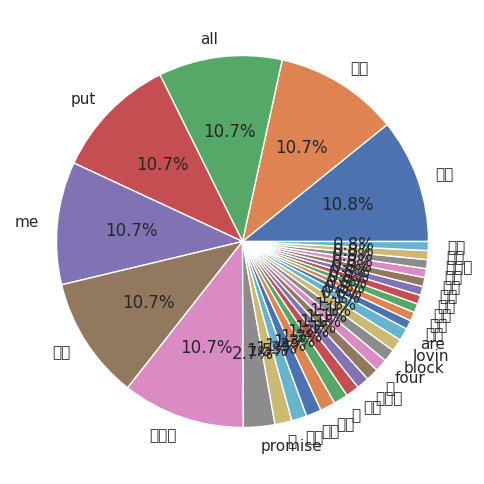

In [51]:
f, ax = plt.subplots(figsize=(6, 15))
limits = 30
en_count_df = count_df[is_english]
samples = en_count_df.iloc[:limits][['count', 'form']]
etc = en_count_df.iloc[limits:]['count'].sum()
# sns.barplot(x='count', y='form', data=en_count_df[['form', 'count']].iloc[:30], ax=ax)
plt.pie(list(samples['count']), labels=list(samples['form']), autopct='%1.1f%%')
plt.show()

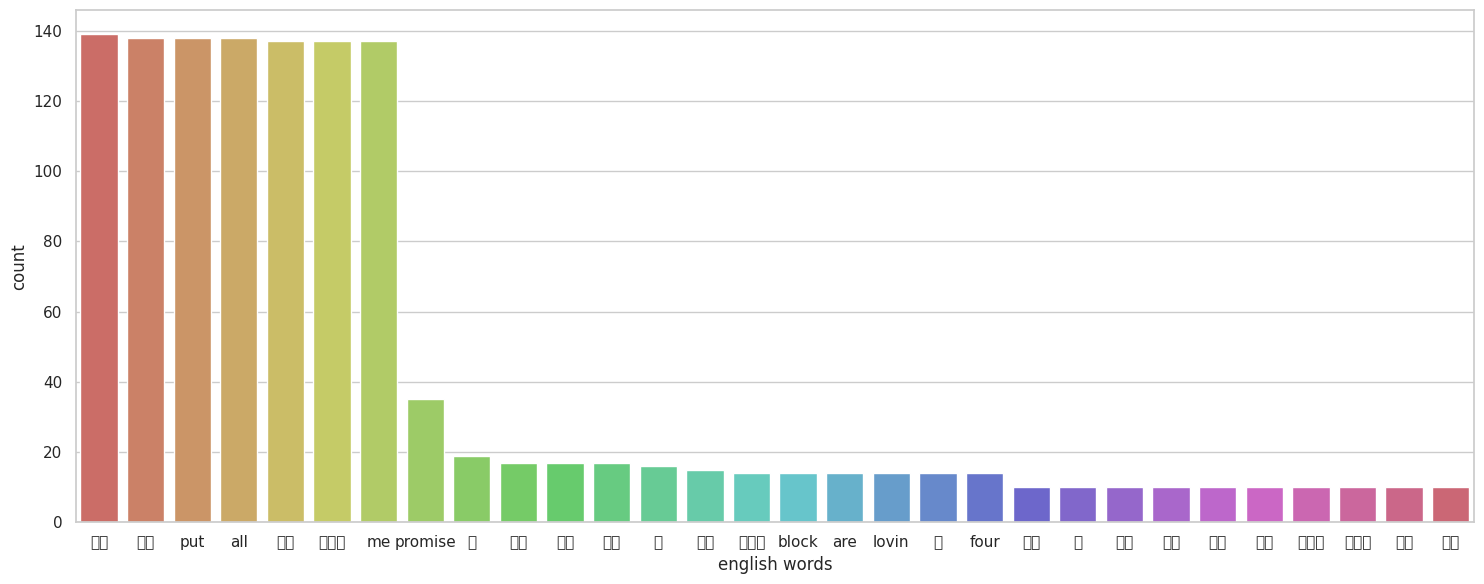

In [44]:
f, ax = plt.subplots(figsize=(15, 6))
limits = 30
df = count_df[is_english].sort_values(by='count', ascending=False).iloc[:limits]
samples = df[['count', 'form']]
sns.barplot(x='form', y='count', data=samples, ax=ax, palette=sns.color_palette("hls", limits))
plt.xlabel('english words')
plt.tight_layout()
plt.show()

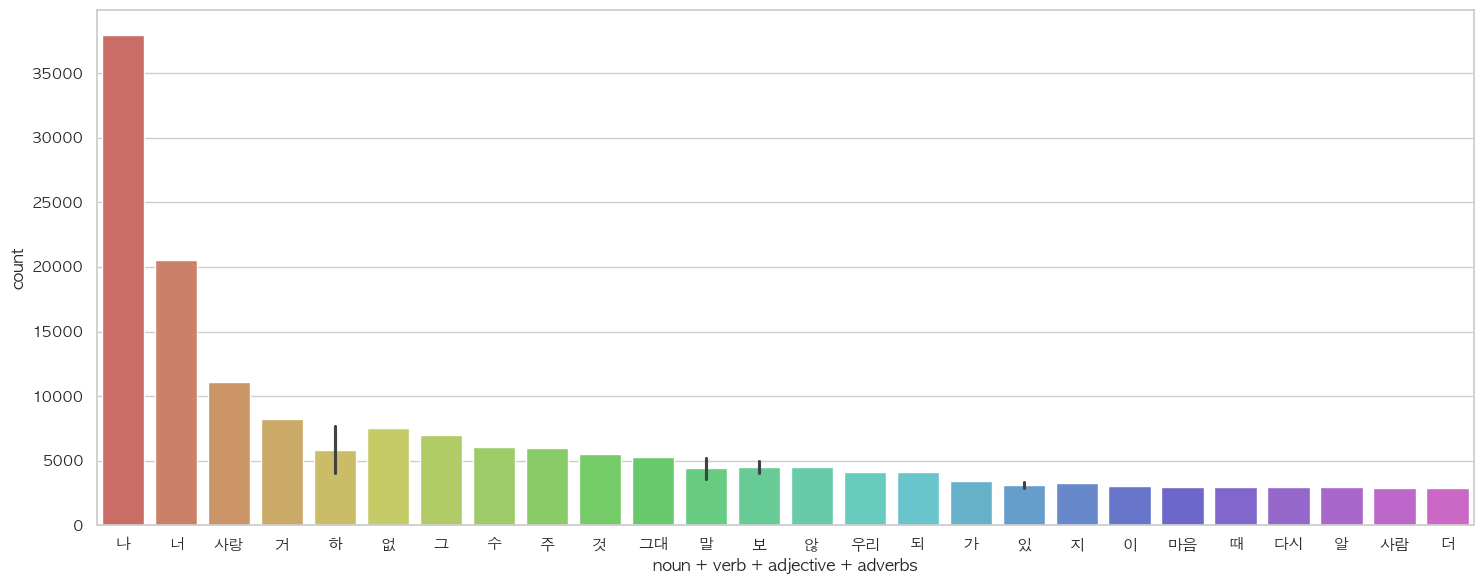

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
limits = 30
df = count_df[is_noun | is_verb | is_adjective | is_adverbs].sort_values(by='count', ascending=False).iloc[:limits]
samples = df[['count', 'form']]
sns.barplot(x='form', y='count', data=samples, ax=ax, palette=sns.color_palette("hls", limits))
# plt.pie(list(samples['count']), labels=list(samples['form']), autopct='%1.1f%%')
plt.xlabel('noun + verb + adjective + adverbs')
plt.tight_layout()
plt.show()

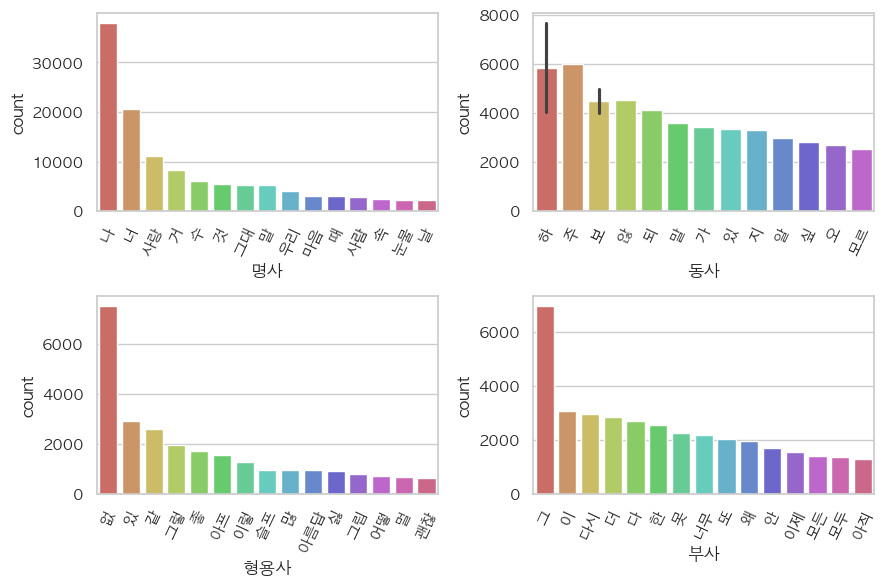

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(9, 6))
limits = 15
titles = ["명사", "동사", "형용사", "부사"]
conditions = [is_noun, is_verb, is_adjective, is_adverbs]
for i, (title, cond) in enumerate(zip(titles, conditions)):
    ax = axes[i // 2, i % 2]
    df = count_df[cond].sort_values(by='count', ascending=False).iloc[:limits]
    samples = df[['count', 'form']]
    sns.barplot(x='form', y='count', data=samples, ax=ax, palette=sns.color_palette("hls", limits))
    ax.xaxis.set_tick_params(rotation=65)
    ax.set_xlabel(title)
plt.tight_layout(pad=1)
plt.show()

In [ ]:
def tokenize(text) -> list:
    text = text if type(text) is str else ''
    text = text.replace('\n', ' ').lower().strip()
    return kiwi.tokenize(text)

In [ ]:
import numpy as np

kr_alpha_tags = [
    "NNG", "NNP", "NNB", "NR", "NP", # 체언 (명사, 수사)
    "VV", "VA", "VX", "VCP", "VCN",  # 용언 (동사, 형용사, 보조 용언, 지시사)
    "MM", "MAG", "MAJ", # 관형사, 일반 부사, 접속 부사
    "JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC", # 조사
    "EP", "EF", "EC", "ETN", "ETM", # 어미
    "XPN", "XSN", "XSV", "XSA", "XSM", "XR", # 접두사, 접미사, 어근
]

rows = []
years = sorted(lyrics_all_df.year.unique())

for year in tqdm(years):
    df = lyrics_all_df[lyrics_all_df.year == year].copy()
    kr_wc, en_wc, etc = [], [], []
    kr_wc_r, en_wc_r, etc_r = [], [], []
    cnts = []
    for l in df['lyric']:
        tokens = tokenize(tokens)
        total = len(tokens)
        k, e = 0, 0
        for token in tokens:
            tag = str(token.tag).replace('-I', '').replace('-R', '')
            if tag in kr_alpha_tags:
                k += 1
            elif tag == "SL":
                e += 1
        z = total - k - e
        cnts.append(total)
        kr_wc.append(k)
        kr_wc_r.append(k / total if total > 0 else 0)
        en_wc.append(e)
        en_wc_r.append(e / total if total > 0 else 0)
        etc.append(z)
        etc_r.append(z / total if total > 0 else 0)

    rows.append([
        sum(kr_wc), sum(en_wc), sum(etc),
        np.mean(kr_wc_r), np.mean(en_wc_r), np.mean(etc_r),
        np.mean(cnts),
    ])

rows = np.array(rows)
print(rows)

  0%|          | 0/60 [00:00<?, ?it/s]

[[1.90700000e+03 0.00000000e+00 2.60000000e+01 8.95807318e-01
  0.00000000e+00 1.32835909e-02 8.78636364e+01]
 [1.07200000e+03 0.00000000e+00 8.00000000e+00 5.84196787e-01
  0.00000000e+00 4.03850758e-03 6.35294118e+01]
 [2.65300000e+03 0.00000000e+00 2.20000000e+01 8.51174595e-01
  0.00000000e+00 5.96826225e-03 9.55357143e+01]
 [4.16700000e+03 0.00000000e+00 4.70000000e+01 8.43163498e-01
  0.00000000e+00 1.04950386e-02 1.02780488e+02]
 [2.73000000e+03 8.00000000e+01 4.70000000e+01 8.96558740e-01
  1.54327689e-02 1.65799195e-02 1.02035714e+02]
 [3.82300000e+03 0.00000000e+00 3.90000000e+01 8.73287851e-01
  0.00000000e+00 9.06509038e-03 1.13588235e+02]
 [2.43400000e+03 0.00000000e+00 2.10000000e+01 7.63233309e-01
  0.00000000e+00 5.99746001e-03 9.44230769e+01]
 [3.11800000e+03 4.20000000e+01 6.30000000e+01 7.88148159e-01
  7.95454545e-03 1.63972953e-02 1.00718750e+02]
 [4.83400000e+03 0.00000000e+00 5.40000000e+01 8.77244945e-01
  0.00000000e+00 9.11869181e-03 1.11090909e+02]
 [5.535000

In [ ]:
cnt_df = pd.DataFrame(rows, columns=[
    'kr_words', 'en_words', 'etc_words',
    'kr_words_ratio', 'en_words_ratio', 'etc_words_ratio',
    'avg_tokens'
])
cnt_df['year'] = years
for col in ['kr_words', 'en_words', 'etc_words']:
    cnt_df[col] = cnt_df[col].astype(int)
cnt_df = cnt_df[[
    'year', 'avg_tokens',
    'kr_words', 'en_words', 'etc_words',
    'kr_words_ratio', 'en_words_ratio', 'etc_words_ratio'
]]
cnt_df

,year,avg_tokens,kr_words,en_words,etc_words,kr_words_ratio,en_words_ratio,etc_words_ratio
0,1964,87.863636,1907,0,26,0.895807,0.000000,0.013284
1,1965,63.529412,1072,0,8,0.584197,0.000000,0.004039
2,1966,95.535714,2653,0,22,0.851175,0.000000,0.005968
3,1967,102.780488,4167,0,47,0.843163,0.000000,0.010495
4,1968,102.035714,2730,80,47,0.896559,0.015433,0.016580
5,1969,113.588235,3823,0,39,0.873288,0.000000,0.009065
6,1970,94.423077,2434,0,21,0.763233,0.000000,0.005997
7,1971,100.718750,3118,42,63,0.788148,0.007955,0.016397
8,1972,111.090909,4834,0,54,0.877245,0.000000,0.009119
9,1973,143.743590,5535,0,71,0.885767,0.000000,0.011669


In [ ]:
ratio_df = cnt_df[['year']].copy()
ratio_df['kr_en'] = cnt_df['kr_words_ratio'] / (cnt_df['kr_words_ratio'] + cnt_df['en_words_ratio'])
ratio_df['en_kr'] = cnt_df['en_words_ratio'] / (cnt_df['kr_words_ratio'] + cnt_df['en_words_ratio'])
ratio_df

,year,kr_en,en_kr
0,1964,1.000000,0.000000
1,1965,1.000000,0.000000
2,1966,1.000000,0.000000
3,1967,1.000000,0.000000
4,1968,0.983078,0.016922
5,1969,1.000000,0.000000
6,1970,1.000000,0.000000
7,1971,0.990008,0.009992
8,1972,1.000000,0.000000
9,1973,1.000000,0.000000


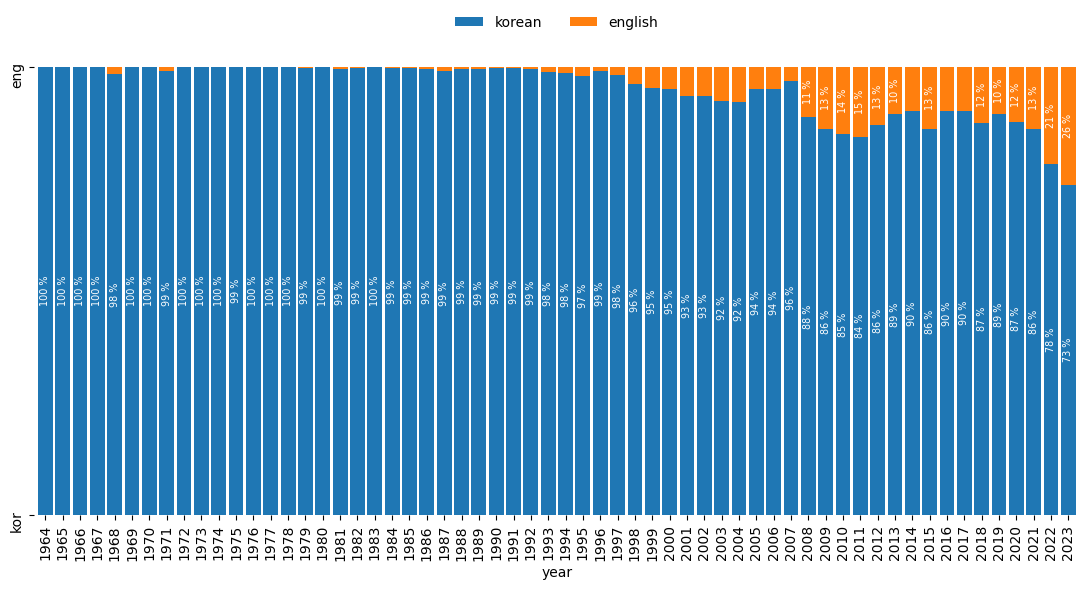

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=[11, 6])
x_var, y_var = "kr_en", "en_kr"
df_grouped = ratio_df[[x_var, y_var]]
df_grouped.columns = ['korean', 'english']
df_grouped.plot.bar(stacked=True, width=0.85, ax=ax)
plt.xticks(ticks=range(len(df_grouped)), labels=ratio_df['year'], rotation=90)
plt.yticks(ticks=[0, 1], labels=['kor', 'eng'], rotation=90)
plt.legend(
    bbox_to_anchor=(0.5, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=2
)
for ix, row in df_grouped.reset_index(drop=True).iterrows():
    cumulative = 0
    for element in row:
        if element == element and element > 0.1:
            plt.text(
                ix,
                cumulative + element / 2,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
                rotation=90,
                color="white",
                fontsize="x-small",
            )
        cumulative += element
plt.xlabel('year')
# plt.ylabel('korean vs. english')
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
plt.tight_layout()

In [ ]:
df = cnt_df.copy()
df['kr_ratio'] = ratio_df['kr_en']
df['en_ratio'] = ratio_df['en_kr']
df.to_csv('language_ratio_per_year.csv', index=False)

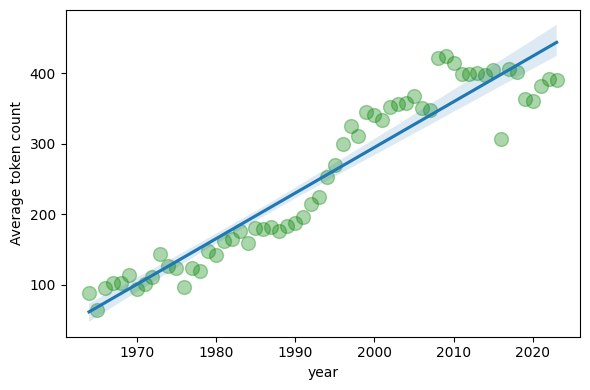

In [ ]:
plt.figure(figsize=(6, 4))
sns.regplot(data=cnt_df, x='year', y='avg_tokens', scatter_kws={"fc": "g", "ec": "g", "s": 100, "alpha": 0.33})
plt.ylabel('Average token count')
plt.tight_layout()
plt.show()

In [ ]:
tags_to_see = set([
    "NNG", "NNP", "NNB", # 체언 (일반 명사, 고유 명사, 의존 명사)
    # "NR", "NP", # 체언 (수사, 대명사)
    "VV", "VA", "VX", "VCP", "VCN",  # 용언 (동사, 형용사, 보조 용언, 지시사)
    # "MM", "MAG", "MAJ", # 관형사, 일반 부사, 접속 부사
    # "JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC", # 조사
    # "EP", "EF", "EC", "ETN", "ETM", # 어미
    # "XPN", "XSN", "XSV", "XSA", "XSM", "XR", # 접두사, 접미사, 어근
])

rows = []
tags_counter = Counter()
for year in tqdm(years):
    df = lyrics_all_df[lyrics_all_df.year == year].copy()
    c = Counter()
    tl = 0
    for lyric in df['lyric']:
        tokens = tokenize(lyric)
        tl += len(tokens)
        for token in tokens:
            form = str(token.form or '')
            if token.tag in tags_to_see:
                c[form] += 1
    flatten = [i for a in c.most_common(n=10) for i in a]
    rows.append([year, tl] + flatten)
    tags_counter += c
    del c

tags_counter.most_common(n=10)

  0%|          | 0/60 [00:00<?, ?it/s]

[('이', 19671),
 ('하', 13028),
 ('사랑', 12237),
 ('말', 10213),
 ('보', 10010),
 ('있', 9445),
 ('거', 9053),
 ('없', 8346),
 ('주', 7761),
 ('수', 6859)]

In [ ]:
tags_counter.most_common(n=30)

[('이', 19671),
 ('하', 13028),
 ('사랑', 12237),
 ('말', 10213),
 ('보', 10010),
 ('있', 9445),
 ('거', 9053),
 ('없', 8346),
 ('주', 7761),
 ('수', 6859),
 ('것', 6184),
 ('가', 6034),
 ('않', 5102),
 ('되', 4572),
 ('지', 4252),
 ('오', 4109),
 ('알', 3366),
 ('마음', 3351),
 ('때', 3300),
 ('싶', 3279),
 ('사람', 3144),
 ('같', 2896),
 ('날', 2888),
 ('버리', 2848),
 ('모르', 2819),
 ('속', 2765),
 ('잊', 2703),
 ('눈물', 2510),
 ('맘', 2403),
 ('떠나', 2358)]

In [ ]:
cols = []
for i in range(1, 11, 1):
    cols += [f"top_{i}_w", f"top_{i}_c"]
rows = np.array(rows)
print(rows.shape, cols)
top_10_wcy_df = pd.DataFrame(rows, columns=['year', 'tokens'] + cols)
top_10_wcy_df

(60, 22) ['top_1_w', 'top_1_c', 'top_2_w', 'top_2_c', 'top_3_w', 'top_3_c', 'top_4_w', 'top_4_c', 'top_5_w', 'top_5_c', 'top_6_w', 'top_6_c', 'top_7_w', 'top_7_c', 'top_8_w', 'top_8_c', 'top_9_w', 'top_9_c', 'top_10_w', 'top_10_c']


,year,tokens,top_1_w,top_1_c,top_2_w,top_2_c,top_3_w,top_3_c,top_4_w,top_4_c,...,top_6_w,top_6_c,top_7_w,top_7_c,top_8_w,top_8_c,top_9_w,top_9_c,top_10_w,top_10_c
0,1964,1933,이,24,가,23,오,17,밤,16,...,잊,15,아가씨,12,보,12,가슴,12,마음,12
1,1965,1080,이,26,마음,12,하,10,모르,9,...,말,7,꿈,7,이름,7,소녀,7,것,7
2,1966,2675,가,32,이,28,사랑,25,길,22,...,보,18,말,18,오,17,밤,17,가슴,17
3,1967,4214,사랑,76,하,60,이,49,가,46,...,울,40,말,38,오,28,보,25,사람,23
4,1968,2857,가,39,사랑,32,하,31,마음,25,...,길,24,없,24,지,20,보,17,가슴,15
5,1969,3862,사랑,78,이,51,꽃,50,사람,36,...,가,31,오,31,보,24,하,24,님,23
6,1970,2455,이,44,사랑,40,가,30,주,29,...,마음,23,울,23,잊,23,모르,21,사람,17
7,1971,3223,이,57,오,55,가,43,사랑,34,...,말,27,사람,27,주,25,마음,18,있,18
8,1972,4888,이,78,달,56,가,55,사랑,45,...,별,32,하,30,말,25,보,23,뜨,23
9,1973,5606,가,69,이,68,하,54,오,48,...,사랑,44,보,43,있,41,말,39,만나,32


In [ ]:
rows = []
words_group = set(["이","하","사랑","말","보","있","거","없","주","것","가","않","되","오","알","마음"])

for year in tqdm(years):
    df = lyrics_all_df[lyrics_all_df.year == year].copy()
    c = {w: 0 for w in words_group}
    tl = 0
    for lyric in df['lyric']:
        tokens = tokenize(lyric)
        tl += len(tokens)
        for token in tokens:
            form = str(token.form or '')
            if form in words_group:
                c[form] += 1
    rows.append([year, tl] + list(c.values()))

cols = list(({w: 0 for w in words_group}).keys())
wcy_df = pd.DataFrame(np.array(rows), columns=['year', 'tokens'] + cols)
wcy_df

  0%|          | 0/60 [00:00<?, ?it/s]

,year,tokens,보,오,알,않,거,주,것,되,있,말,없,하,마음,가,사랑,이
0,1964,1933,12,22,0,1,0,7,5,5,5,8,1,36,12,30,8,69
1,1965,1080,3,6,0,2,0,5,7,2,4,7,3,19,12,18,6,51
2,1966,2675,18,19,4,7,1,5,1,1,15,18,17,53,11,54,25,82
3,1967,4214,25,37,15,8,8,19,16,9,10,38,19,132,45,86,76,127
4,1968,2857,17,25,4,4,0,13,4,2,9,8,24,76,25,55,32,97
5,1969,3862,24,43,11,10,0,11,3,8,8,22,12,86,13,60,78,129
6,1970,2455,7,41,5,1,0,29,2,3,3,9,13,70,23,44,40,75
7,1971,3223,13,78,3,8,3,25,6,0,18,27,10,82,18,72,34,136
8,1972,4888,23,58,0,11,5,16,6,5,14,25,17,100,10,92,45,167
9,1973,5606,43,61,21,14,5,25,16,3,41,39,21,150,45,123,44,161


/var/folders/gr/htls9_1d35n657q516khzk_c0000gn/T/ipykernel_30932/430623521.py:2: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


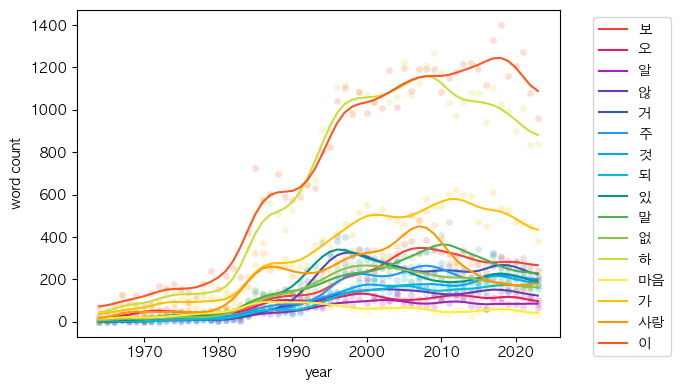

In [ ]:
from matplotlib import rc
from scipy.ndimage.filters import gaussian_filter1d

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(7, 4))
color16 = [
    "#f44336","#e81e63","#9c27b0","#673ab7","#3f51b5","#2196f3","#03a9f4","#00bcd4",
    "#009688","#4caf50","#8bc34a","#cddc39","#ffeb3b","#ffc107","#ff9800","#ff5722",
]
for col, color in zip(cols, color16):
    df1 = wcy_df[['year', col]]
    df1.loc[:, col] = gaussian_filter1d(df1[col], sigma=2)
    sns.scatterplot(data=wcy_df, x='year', y=col, fc=color, s=25, alpha=0.2)
    # sns.lineplot(data=wcy_df, x='year', y=col, color=color, alpha=0.2, linewidth=1, linestyle='--')
    sns.lineplot(data=df1, x='year', y=col, color=color, label=col) # smooth line
plt.ylabel('word count')
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.show()

In [ ]:
wcy_r_df = wcy_df[cols].apply(lambda sr: sr / wcy_df['tokens'])
wcy_r_df.index = wcy_df['year']
wcy_r_df.head(10)

,보,오,알,않,거,주,것,되,있,말,없,하,마음,가,사랑,이
year,,,,,,,,,,,,,,,,
1964,0.006208,0.011381,0.000000,0.000517,0.000000,0.003621,0.002587,0.002587,0.002587,0.004139,0.000517,0.018624,0.006208,0.015520,0.004139,0.035696
1965,0.002778,0.005556,0.000000,0.001852,0.000000,0.004630,0.006481,0.001852,0.003704,0.006481,0.002778,0.017593,0.011111,0.016667,0.005556,0.047222
1966,0.006729,0.007103,0.001495,0.002617,0.000374,0.001869,0.000374,0.000374,0.005607,0.006729,0.006355,0.019813,0.004112,0.020187,0.009346,0.030654
1967,0.005933,0.008780,0.003560,0.001898,0.001898,0.004509,0.003797,0.002136,0.002373,0.009018,0.004509,0.031324,0.010679,0.020408,0.018035,0.030138
1968,0.005950,0.008750,0.001400,0.001400,0.000000,0.004550,0.001400,0.000700,0.003150,0.002800,0.008400,0.026601,0.008750,0.019251,0.011201,0.033952
1969,0.006214,0.011134,0.002848,0.002589,0.000000,0.002848,0.000777,0.002071,0.002071,0.005697,0.003107,0.022268,0.003366,0.015536,0.020197,0.033402
1970,0.002851,0.016701,0.002037,0.000407,0.000000,0.011813,0.000815,0.001222,0.001222,0.003666,0.005295,0.028513,0.009369,0.017923,0.016293,0.030550
1971,0.004034,0.024201,0.000931,0.002482,0.000931,0.007757,0.001862,0.000000,0.005585,0.008377,0.003103,0.025442,0.005585,0.022339,0.010549,0.042197
1972,0.004705,0.011866,0.000000,0.002250,0.001023,0.003273,0.001227,0.001023,0.002864,0.005115,0.003478,0.020458,0.002046,0.018822,0.009206,0.034165


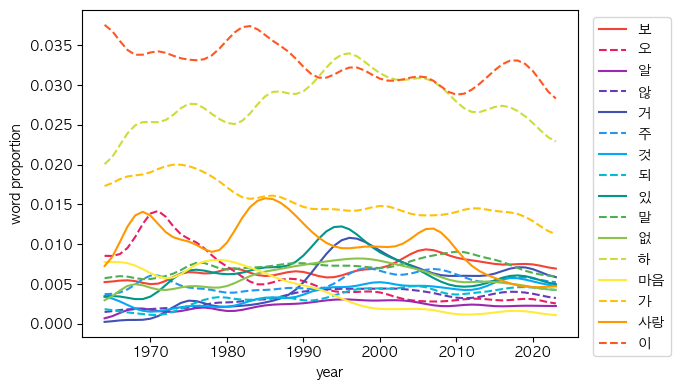

In [ ]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(7, 4))
# color8 = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#dbcc08"]
lsty = ['-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--']
for col, color, ls in zip(cols, color16, lsty):
    df1 = wcy_r_df[[col]].copy()
    df1.loc[:, col] = gaussian_filter1d(df1[col], sigma=2)
    sns.lineplot(data=df1, x=df1.index, y=col, color=color, label=col, linestyle=ls) # smooth line
plt.ylabel('word proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.tight_layout()
plt.show()

In [ ]:
c10 = Counter()
for row in top_10_wcy_df.values:
    row = row[2:]
    for i in range(5):
        form, cnt = row[i * 2], row[i * 2 + 1]
        c10[str(form)] += int(cnt)
c10

Counter({'이': 19671,
         '하': 12681,
         '사랑': 10264,
         '보': 6466,
         '말': 6428,
         '거': 4896,
         '있': 4343,
         '가': 1328,
         '없': 1163,
         '마음': 469,
         '수': 445,
         '주': 363,
         '오': 322,
         '것': 319,
         '달': 56,
         '꽃': 50,
         '라': 40,
         '사람': 36,
         '뛰뛰': 36,
         '마리아': 35,
         '길': 22,
         '살짜기': 21,
         '밤': 16,
         '울': 15,
         '모르': 9})

In [ ]:
cols = ["이", "하", "사랑", "보", "말", "거", "있", "가", "없", "마음", "수", "주", "오", "것", "달"]
rows = []
for row in top_10_wcy_df.values:
    row = row[2:]
    d = {col: 0 for col in cols}
    for i in range(5):
        form, cnt = row[i * 2], row[i * 2 + 1]
        if form in d:
            d[form] = cnt
    keys = d.keys()
    rows += [list(d.values())]

df15 = pd.DataFrame(rows, columns=cols)
df15.index = top_10_wcy_df['year']
df15

,이,하,사랑,보,말,거,있,가,없,마음,수,주,오,것,달
year,,,,,,,,,,,,,,,
1964,24,0,0,0,0,0,0,23,0,0,0,0,17,0,0
1965,26,10,0,0,0,0,0,9,0,12,0,0,0,0,0
1966,28,0,25,0,0,0,0,32,0,0,0,0,0,0,0
1967,49,60,76,0,0,0,0,46,0,45,0,0,0,0,0
1968,25,31,32,0,0,0,0,39,0,25,0,0,0,0,0
1969,51,0,78,0,0,0,0,0,0,0,0,0,0,0,0
1970,44,0,40,0,0,0,0,30,0,0,0,29,27,0,0
1971,57,32,34,0,0,0,0,43,0,0,0,0,55,0,0
1972,78,0,45,0,0,0,0,55,0,0,0,0,43,0,56


![](docs/kiwi/word_freq_per_year.png)

In [ ]:
cols = ["이", "하", "사랑", "보", "말", "거", "있", "가", "없", "마음", "수", "주", "오", "것", "달"]
rows = []
for row in top_10_wcy_df.values:
    row = row[2:]
    d = {col: 0 for col in cols}
    ca = 0
    for i in range(5):
        form, cnt = row[i * 2], row[i * 2 + 1]
        if form in d:
            d[form] = int(cnt)
            ca += int(cnt)
    keys = d.keys()
    lr = [v / ca for v in d.values()]
    rows += [lr]

df15 = pd.DataFrame(rows, columns=cols)
df15.index = top_10_wcy_df['year']
df15

,이,하,사랑,보,말,거,있,가,없,마음,수,주,오,것,달
year,,,,,,,,,,,,,,,
1964,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.359375,0.000000,0.000000,0.000000,0.000000,0.265625,0.000000,0.000000
1965,0.456140,0.175439,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895,0.000000,0.210526,0.000000,0.000000,0.000000,0.000000,0.000000
1966,0.329412,0.000000,0.294118,0.000000,0.000000,0.000000,0.000000,0.376471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1967,0.177536,0.217391,0.275362,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.163043,0.000000,0.000000,0.000000,0.000000,0.000000
1968,0.164474,0.203947,0.210526,0.000000,0.000000,0.000000,0.000000,0.256579,0.000000,0.164474,0.000000,0.000000,0.000000,0.000000,0.000000
1969,0.395349,0.000000,0.604651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1970,0.258824,0.000000,0.235294,0.000000,0.000000,0.000000,0.000000,0.176471,0.000000,0.000000,0.000000,0.170588,0.158824,0.000000,0.000000
1971,0.257919,0.144796,0.153846,0.000000,0.000000,0.000000,0.000000,0.194570,0.000000,0.000000,0.000000,0.000000,0.248869,0.000000,0.000000
1972,0.281588,0.000000,0.162455,0.000000,0.000000,0.000000,0.000000,0.198556,0.000000,0.000000,0.000000,0.000000,0.155235,0.000000,0.202166


![](docs/kiwi/word_freq_r_per_year.png)

In [ ]:
def filter_counter(counter, threshold = 1):
    return Counter({k: c for k, c in counter.items() if c >= threshold})

In [ ]:
import re

def remove_special_chars(text):
    text = re.sub('[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣]', ' ', text)
    return re.sub('[\s]{2,}', ' ', text).replace('\n', ' ')

def normalize(v):
    return np.array(v, dtype=np.float32) / np.linalg.norm(v)

def split_sentence(s):
    l = "" if type(s) != str else s
    l = remove_special_chars(l).strip().lower()
    return l.split()

def get_repeatability_type1(lyric):
    if (type(lyric) != str) or (lyric == 'nan') or len(lyric) < 0:
        return 0.0
    a = split_sentence(lyric)
    c = Counter(a)
    c = filter_counter(c, threshold=2)
    freq = np.array(list(c.values() or []))
    c2 = Counter(freq)
    if len(freq) == 0:
        if len(a) > 0:
            # 가사는 있으나 2번 등장 필터(threshold=2)에서 모두 사라짐
            # 즉, 모든 단어가 1번 등장했음
            return 1.0 # base
        else:
            return 0.0
    return sum([k * v for k, v in c2.items()]) ** .5

def get_repeatability_type2(lyric):
    a = split_sentence(lyric)
    n = len(a)
    if n == 0: return 0
    if n == 1: return 1
    c = Counter(a)
    # 집합 A에서 w_i가 등장할 확률 * A-{w_i} 에서 w_i가 다시 등장할 확률 (겹칠 확률)
    return np.mean([v/n*(v-1)/(n-1) for v in c.values()])

def get_repeatability_type3(lyric):
    # 단어가 중복되어 등장할 확률 * 가사 길이
    return get_repeatability_type2(lyric) * len(lyric)

In [ ]:
sample_ids = [711626, 36635522, 36761467, 5758967]
unique_songs_all = lyrics_all_df.drop_duplicates('id')
samples = unique_songs_all[unique_songs_all.id.isin(sample_ids)]
ci_title = list(samples.columns).index("title")
ci_singer = list(samples.columns).index("singer")
ci_lyric = list(samples.columns).index("lyric")
for idx, row in samples.iterrows():
    title, singer, lyric = row[ci_title], row[ci_singer], row[ci_lyric]
    print(title, singer, f"{get_repeatability_type1(lyric):3.8f}", f"{get_repeatability_type2(lyric):3.8f}")

물새우는 해변 권혜경 6.16441400 0.00142248
살다가 SG 워너비 11.48912529 0.00032121
ETA NewJeans 15.42724862 0.00012659
Smoke Prod Dynamicduo Padi 다이나믹 듀오 18.86796226 0.00005617


In [ ]:
df.sort_values(by='repeat_type1')

# sns.barplot(data=df, x="total", y="abbrev", data=crashes,
#             label="Total", color="b")

In [ ]:
def collapse_text(t):
    t = t.replace(' ', '')
    if len(t) < 5:
        return str(t)
    return f"{t[:5]}.."

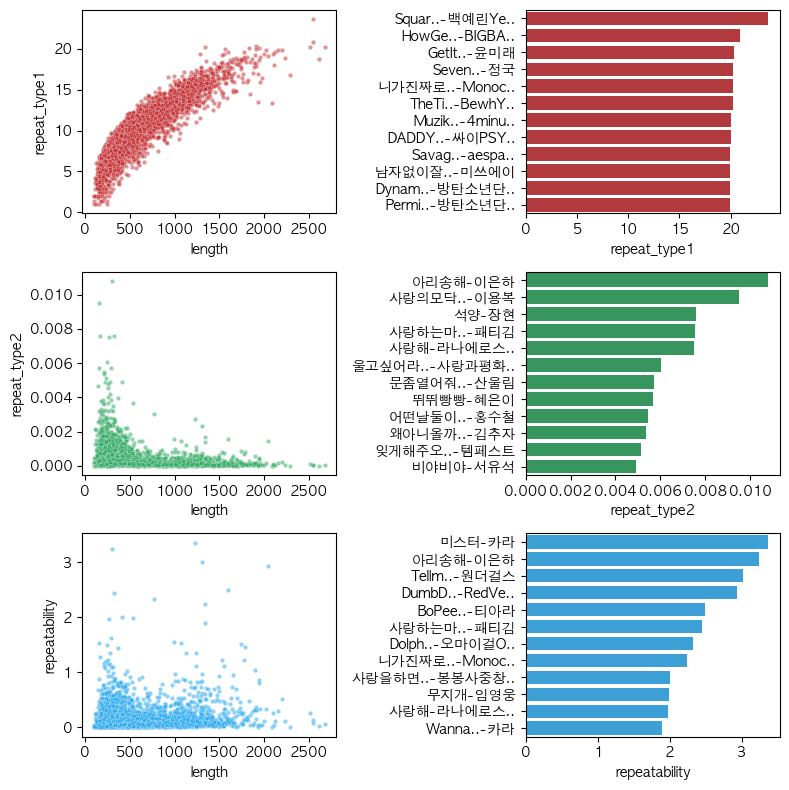

In [ ]:
fix, axes = plt.subplots(3, 2, figsize=(8, 8))

df = unique_songs_all[~unique_songs_all['lyric'].isna()].copy()
df['length'] = df['lyric'].apply(len)
df['display'] = df['title'].apply(collapse_text) + '-' + df['singer'].apply(collapse_text)

df['repeat_type1'] = df['lyric'].apply(get_repeatability_type1)
sns.scatterplot(data=df, x='length', y='repeat_type1', ax=axes[0, 0], color='#C3272B', alpha=0.5, s=10)
df1 = df.copy().sort_values('repeat_type1', ascending=False).iloc[:12]
sns.barplot(data=df1, y='display', x='repeat_type1', ax=axes[0, 1], color='#C3272B')

df['repeat_type2'] = df['lyric'].apply(get_repeatability_type2)
sns.scatterplot(data=df, x='length', y='repeat_type2', ax=axes[1, 0], color='#26A65B', alpha=0.5, s=10)
df1 = df.copy().sort_values('repeat_type2', ascending=False).iloc[:12]
sns.barplot(data=df1, y='display', x='repeat_type2', ax=axes[1, 1], color='#26A65B')

df['repeatability'] = df['lyric'].apply(get_repeatability_type3)
sns.scatterplot(data=df, x='length', y='repeatability', ax=axes[2, 0], color='#22A7F0', alpha=0.5, s=10)
df1 = df.copy().sort_values('repeatability', ascending=False).iloc[:12]
sns.barplot(data=df1, y='display', x='repeatability', ax=axes[2, 1], color='#22A7F0')

for i in range(3):
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
df1 = df.copy().sort_values('repeatability', ascending=False)[['repeatability', 'title', 'singer']].iloc[:30]
df1['song'] = df1['title'] + ' - ' + df1['singer']
rows = list(df1[['repeatability', 'song']].values)

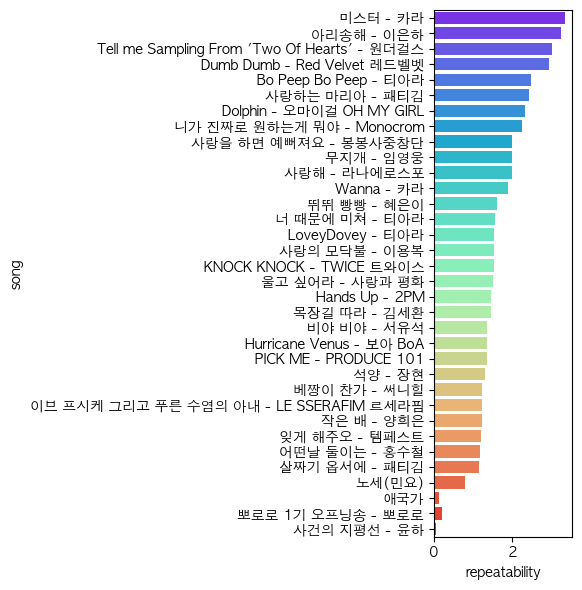

In [ ]:
lyric = """노세노세 젊어서 놀아 늙어지며는 못노나니
화무는 십일홍이요 달도 차면 기우나니라
얼시구절시구 차차차(차차차)
지화자 좋구나 차차차(차차차)
화란춘성 만화방창 아니노지는 못하리라
차차차(차차차)차차차(차차차)

가세가세 산천경계로 늙기나 전에 구경가세
인생은 일장의 춘몽 둥글둥글 살아나가자
얼시구절시구 차차차(차차차)
지화자 좋구나 차차차(차차차)
춘풍화류 호시절에 아니노지는 못하리라
차차차(차차차) 차차차(차차차)"""
rows.append((get_repeatability_type3(lyric), "노세(민요)"))

lyric = """동해 물과 백두산이 마르고 닳도록
하느님이 보우하사 우리나라 만세.
무궁화 삼천리 화려 강산
대한 사람, 대한으로 길이 보전하세.

남산 위에 저 소나무, 철갑을 두른 듯
바람 서리 불변함은 우리 기상일세.
무궁화 삼천리 화려 강산
대한 사람, 대한으로 길이 보전하세.

가을 하늘 공활한데 높고 구름 없이
밝은 달은 우리 가슴 일편단심일세.
무궁화 삼천리 화려 강산
대한 사람, 대한으로 길이 보전하세.

이 기상과 이 맘으로 충성을 다하여
괴로우나 즐거우나 나라 사랑하세.
무궁화 삼천리 화려 강산
대한 사람, 대한으로 길이 보전하세."""
rows.append((get_repeatability_type3(lyric), "애국가"))

lyric = """야 뽀로로다
노는 게 제일 좋아 친구들 모여라
언제나 즐거워 개구쟁이 뽀로로
눈 덮인 숲 속 마을 꼬마 펭귄 나가신다
언제나 즐거워 오늘은 또 무슨 일이 생길까
뽀로로를 불러봐요 뽀롱뽀롱
뽀로로 뽀롱뽀롱 뽀로로
뽀롱뽀롱 뽀롱뽀롱 뽀롱뽀롱 뽀롱 뽀로로
노는 게 제일 좋아 친구들 모여라
언제나 즐거워
뽀롱 뽀롱 뽀롱 뽀롱 뽀로로"""
rows.append((get_repeatability_type3(lyric), "뽀로로 1기 오프닝송 - 뽀로로"))

lyric = """생각이 많은 건 말이야
당연히 해야 할 일이야
나에겐 우리가 지금 1순위야
안전한 유리병을 핑계로
바람을 가둬 둔 것 같지만
기억나? 그날의 우리가
잡았던 그 손엔 말이야
설레임보다 커다란 믿음이 담겨서
난 함박웃음을 지었지만
울음이 날 것도 같았어
소중한 건 언제나 두려움이니까
문을 열면 들리던 목소리
너로 인해 변해있던 따뜻한 공기
여전히 자신 없지만 안녕히
저기 사라진 별의 자리
아스라이 하얀 빛
한동안은 꺼내 볼 수 있을 거야
아낌없이 반짝인 시간은
조금씩 옅어져 가더라도
너와 내 맘에 살아 숨 쉴 테니
여긴 서로의 끝이 아닌
새로운 길 모퉁이
익숙함에 진심을 속이지 말자
하나 둘 추억이 떠오르면
많이 많이 그리워할 거야
고마웠어요 그래도 이제는
사건의 지평선 너머로
솔직히 두렵기도 하지만
노력은 우리에게 정답이 아니라서
마지막 선물은 산뜻한 안녕
저기 사라진 별의 자리
아스라이 하얀 빛
한동안은 꺼내 볼 수 있을 거야
아낌없이 반짝인 시간은
조금씩 옅어져 가더라도
너와 내 맘에 살아 숨 쉴 테니
여긴 서로의 끝이 아닌
새로운 길 모퉁이
익숙함에 진심을 속이지 말자
하나 둘 추억이 떠오르면
많이 많이 그리워할 거야
고마웠어요 그래도 이제는
사건의 지평선 너머로
저기 사라진 별의 자리
아스라이 하얀 빛
한동안은 꺼내 볼 수 있을 거야
아낌없이 반짝인 시간은
조금씩 옅어져 가더라도
너와 내 맘에 살아 숨 쉴 테니
여긴 서로의 끝이 아닌
새로운 길 모퉁이
익숙함에 진심을 속이지 말자
하나 둘 추억이 떠오르면
많이 많이 그리워할 거야
고마웠어요 그래도 이제는
사건의 지평선 너머로
사건의 지평선 너머로"""
rows.append((get_repeatability_type3(lyric), "사건의 지평선 - 윤하"))

fig, axes = plt.subplots(1, 1, figsize=(6, 6))
df2 = pd.DataFrame(rows, columns=['repeatability', 'song'])
sns.barplot(data=df2, x='repeatability', y='song', palette='rainbow')
plt.tight_layout()
plt.show()

In [ ]:
rows = []
for year in tqdm(years):
    df = lyrics_all_df[(lyrics_all_df.year == year) & (~lyrics_all_df.lyric.isna())]
    rep_scores = df['lyric'].astype(str).apply(get_repeatability_type3)
    for (idx, row), score in zip(df.iterrows(), rep_scores):
        rows.append((row[0], row[1], row[2], row[3], score))

rep_df = pd.DataFrame(rows, columns=['id', 'year', 'title', 'singer', 'repeat'])
rep_df

  0%|          | 0/60 [00:00<?, ?it/s]

,id,year,title,singer,repeat
0,467355,1964,마도로스 부기,백야성,0.604545
1,467498,1964,빨간구두 아가씨,남일해,0.127462
2,992864,1964,아메리칸 마도로스,고봉산,0.153075
3,1002782,1964,동백아가씨,이미자,0.027627
4,1003023,1964,눈물의 연평도,최숙자,0.019086
...,...,...,...,...,...
4453,36635522,2023,ETA,NewJeans,0.143809
4454,36681074,2023,Fast Forward,전소미,0.256736
4455,36713849,2023,Love Lee,AKMU 악뮤,0.082389
4456,36713850,2023,후라이의 꿈,AKMU 악뮤,0.061943


In [ ]:
rep_df.sort_values(by='repeat', ascending=False).iloc[:10]

,id,year,title,singer,repeat
3063,2238379,2009,미스터,카라,3.361053
465,1714362,1979,아리송해,이은하,3.239369
2895,1724693,2008,Tell me Sampling From 'Two Of Hearts',원더걸스,3.012372
2883,1724693,2007,Tell me Sampling From 'Two Of Hearts',원더걸스,3.012372
3670,7847861,2015,Dumb Dumb,Red Velvet 레드벨벳,2.937082
3096,2371262,2010,Bo Peep Bo Peep,티아라,2.490893
126,528046,1969,사랑하는 마리아,패티김,2.440592
4188,32559782,2021,Dolphin,오마이걸 OH MY GIRL,2.326458
4130,32559782,2020,Dolphin,오마이걸 OH MY GIRL,2.326458
2040,83138,1999,니가 진짜로 원하는게 뭐야,Monocrom,2.237721


In [ ]:
agg = rep_df.select_dtypes([int, float]).groupby(by='year')
rep_df_gr = pd.DataFrame({
    'avg': agg.mean()['repeat'],
    'min': agg.min()['repeat'],
    'max': agg.max()['repeat'],
})
rep_df_gr

,avg,min,max
year,,,
1964,0.161925,0.013933,0.604545
1965,0.144748,0.010806,0.324414
1966,0.145576,0.023303,1.149858
1967,0.218252,0.014077,2.003252
1968,0.138885,0.027391,0.451274
1969,0.272878,0.027365,2.440592
1970,0.259338,0.024242,0.871103
1971,0.318985,0.039290,1.979933
1972,0.280051,0.015118,1.443258


In [ ]:
rep_df_gr.sort_values(by='avg', ascending=False).iloc[:20]

,avg,min,max
year,,,
1973,0.369692,0.011031,1.533333
1974,0.346690,0.002824,1.221598
1977,0.331213,0.043575,1.621486
1971,0.318985,0.039290,1.979933
1979,0.312017,0.019212,3.239369
1978,0.290112,0.002429,1.171659
1972,0.280051,0.015118,1.443258
1969,0.272878,0.027365,2.440592
1976,0.272787,0.015617,0.900345


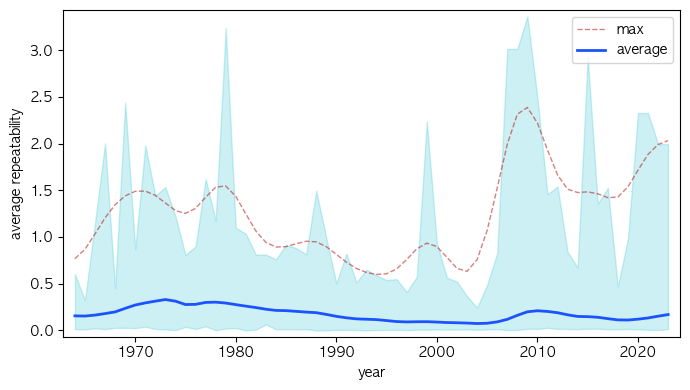

In [ ]:
plt.figure(figsize=(7, 4))
df1 = rep_df_gr.copy()
df1["avg_smooth"] = gaussian_filter1d(df1["avg"], sigma=1)
df1["min_smooth"] = gaussian_filter1d(df1["min"], sigma=2)
df1["max_smooth"] = gaussian_filter1d(df1["max"], sigma=2)
plt.fill_between(df1.index, df1["min"], df1["max"], color="#00b7c7", alpha=0.2)
# sns.lineplot(data=df1, x="year", y="avg", color="#0d88e6", linewidth=1, alpha=0.5, linestyle='--')
# sns.lineplot(data=df1, x=df1.index, y="min_smooth", color="#7c1158", linewidth=1, alpha=0.5, linestyle='--') # smooth line
sns.lineplot(data=df1, x=df1.index, y="max_smooth", color="#b30000", linewidth=1, alpha=0.5, linestyle='--', label='max') # smooth line
sns.lineplot(data=df1, x=df1.index, y="avg_smooth", color="#1a53ff", linewidth=2, alpha=1.0, label='average') # smooth line
plt.ylabel('average repeatability')
plt.margins(0.02, 0.02)
plt.tight_layout()
plt.show()

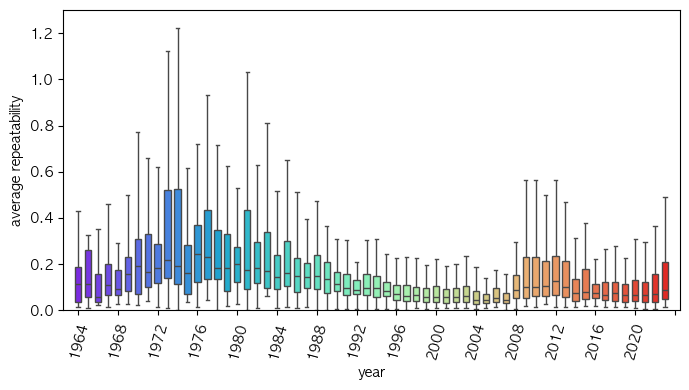

In [ ]:
df = rep_df.copy()
plt.figure(figsize=(7, 4))
plt.ylim((0, 1.3))
sns.boxplot(data=df, x='year', y='repeat', whis=2.0, palette="rainbow", fliersize=0, gap=0.2)
plt.xticks(plt.gca().get_xticks(), rotation=75)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))
plt.ylabel('average repeatability')
plt.margins(0.02, 0.02)
plt.tight_layout()
plt.show()

In [ ]:
df

,id,year,repeat
0,467355,0,0.003322
1,467498,1,0.000768
2,992864,2,0.000668
3,1002782,3,0.000175
4,1003023,4,0.000134
...,...,...,...
4453,36635522,4453,0.000127
4454,36681074,4454,0.000245
4455,36713849,4455,0.000082
4456,36713850,4456,0.000087


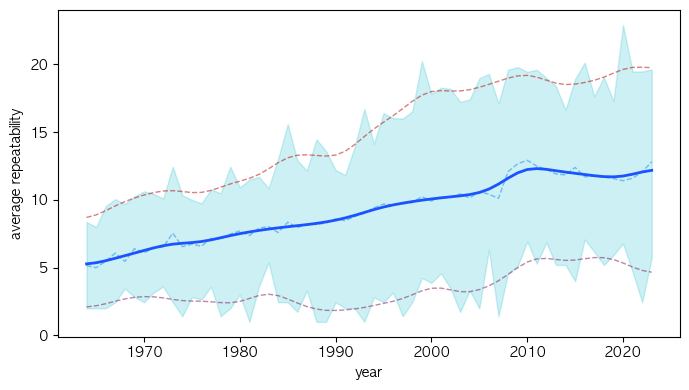

In [ ]:
plt.figure(figsize=(7, 4))
color8 = ["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#dbcc08"]
df1 = rep_df.copy()
df1["avg_rep_smooth"] = gaussian_filter1d(df1["avg_rep"], sigma=2)
df1["min_rep_smooth"] = gaussian_filter1d(df1["min_rep"], sigma=2)
df1["max_rep_smooth"] = gaussian_filter1d(df1["max_rep"], sigma=2)
plt.fill_between(df1['year'], df1["min_rep"], df1["max_rep"], color="#00b7c7", alpha=0.2)
sns.lineplot(data=df1, x="year", y="avg_rep", color="#0d88e6", linewidth=1, alpha=0.5, linestyle='--')
sns.lineplot(data=df1, x="year", y="min_rep_smooth", color="#7c1158", linewidth=1, alpha=0.5, linestyle='--') # smooth line
sns.lineplot(data=df1, x="year", y="max_rep_smooth", color="#b30000", linewidth=1, alpha=0.5, linestyle='--') # smooth line
sns.lineplot(data=df1, x="year", y="avg_rep_smooth", color="#1a53ff", linewidth=2, alpha=1.0) # smooth line
plt.ylabel('average repeatability')
plt.tight_layout()
plt.show()

In [ ]:
get_repeatability("""밤 하늘을 향해
튀어오른 불빛들
칼날같은 시선
무디어진 동정심
출구도 없고
갈길도 없이
고층빌딩 사이를
휴지처럼 뒹구는
가면을 쓰고
똑같은 얼굴
짐승처럼 누비는
화려한 이십일세기

그 어디에 있나
낮이되면 초라한
보도블럭 위에
흔적없는 형광빛
가슴을 채운
싸늘한 공허
눈 내리는 날에는
길마저 사라지고
허기진 사랑
무채색 향기
군중에게 밀리며
이제 어디로 가려나""")

0.0

In [ ]:
get_repeatability("""Don't lose your temper so- so- so quickly
Don't lose your temper so- so- so quickly
Don't lose- don't lose- don't lose- quickly
Don't lose your temper so- so- so quickly, your- so quickly
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, bo peep, oh!
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, oh oh!
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, bo peep, oh!
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, oh oh!
Achim buteo jjuk, tujeongman, jakku burigo
Dareun saramgwa, itnyago, yeshim haneun na
[Boram] Ijen nayege jichyeot dago malhaneun neo
Hwajom naeji mallago [All] Bo peep bo peep bo peep, oh!
Neomu neomuna chakhaetdeon niga
[Hyomin] Nattaeme nattaeme nattaeme byeon haesseo
[Soyeon] Nareul neomu sarang haetdeon niga
[Hyomin] Change one's mind, change one's mind, you!
Follow me! Follow me! Nareul ttara, follow me!
Naneun niga nan niga nan neomu joheun geol
[Eunjung] I'm so sorry ([All] So- so- sorry), nattaeme ijen ([All] Nattaeme ijen)
[Jiyeon] Hwanaeji mara jwo, useo jwo, ije geuman hwa pulgo
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, bo peep, oh!
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, oh oh!
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, bo peep, oh!
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, oh oh!
1, 2, 3, 4, 5, haha!
Bogo shipdago, jakkuman, jeonhwa haeseo tto
Bballi orago, jaechokman, jakku haneun na
[Boram] Ireon naega neomu jigyeob dago malhaneun neo
Hwajom naeji mara jwo [All] Bo peep bo peep bo peep, oh!
Hangsang nal bomyeon useotdeon niga
[Hyomin] Nattaeme nattaeme nattaeme byeon haesseo
[Soyeon] Nae mareun da bada judeon niga
[Hyomin] Change, change, change one's mind!
Follow me! Follow me! Nareul ttara, follow me!
Naneun niga nan niga nan neomu joheun geol
[Eunjung] I'm so sorry ([All] So- so- sorry), nattaeme ijen ([All] Nattaeme ijen)
[Jiyeon] Hwanaeji mara jwo, useo jwo, ije geuman hwa pulgo
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, bo peep, oh!
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, oh oh!
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, bo peep, oh!
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, oh oh!
Yeah, yeah
Ireoneun naye moseubi neol, himdeulge hal jureun mollasseo
[Eunjung] Naega shilheo jyeotdago hajima, we are together!
Follow me! Follow me! Nareul ttara, follow me!
Naneun niga nan niga nan neomu joheun geol
[Soyeon] I'm so sorry ([All] So- so- sorry), nattaeme ijen ([All] Nattaeme ijen)
[Jiyeon] Hwanaeji mara jwo, useo jwo, ije geuman hwa pulgo
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, bo peep, oh!
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, oh oh!
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, bo peep, oh!
Bo peep, bo peep, bo peep, bo peep
Bo peep, bo peep, oh oh!
Don't lose your temper so- so- so quickly
Don't lose your temper so- so- so quickly""")

0.0008374886381579278

In [ ]:
df = unique_songs_all[~unique_songs_all.lyric.isna()].copy()
df['repeatability'] = unique_songs_all['lyric'].astype(str).apply(get_repeatability)
df.sort_values('repeatability', ascending=False).head(10)

,id,year,title,singer,lyric,x_rated,repeatability
543,1714362,1979,아리송해,이은하,아리송해\n\n아리송해\n\n어제 한 너의 말이 아리송해\n\n아리송해\n\n아리송...,False,0.010798
302,2425262,1973,사랑의 모닥불,이용복,무슨까닭인가요무슨사연인가요\n\n싸늘하게식어가는당신의마음\n\n내사랑아내사랑아영원한...,False,0.009524
303,2748909,1973,석양,장현,가야할 사람이기에 안녕\n안녕이라고 말해야지\n\n돌아설 사람이기에 안녕\n안녕이라...,False,0.007587
147,528046,1969,사랑하는 마리아,패티김,마리아 마리아 사랑하는 마리아\n마리아 마리아 사랑하는 마리아\n그대를 보내고 나서...,False,0.007556
201,468381,1971,사랑해,라나에로스포,사랑해 당신을\n정말로 사랑해\n당신이 내곁을\n떠나간 뒤에\n얼마나 눈물을\n흘렸...,False,0.007500
1083,49012,1988,울고 싶어라,사랑과 평화,울고싶어라\n울고싶어라\n이마음\n사랑은 가고\n친구도 가고\n모두다\n왜 가야만 ...,False,0.006052
467,59821,1978,문 좀 열어줘,산울림,내가 있잖어\n여기 있잖어\n문 좀 열어줘\n방긋 웃어줘\n밤이 새겠네\n못 보고 ...,False,0.005728
444,833191,1977,뛰뛰 빵빵,혜은이,버스를 타고 고속도로를\n바람처럼 달려가자\n파도소리가 들려오는\n정다운 그 거리로...,False,0.005689
509,3620661,1978,어떤날 둘이는,홍수철,어떤날 둘이는 좋아한다고\n어떤날 둘이는 사랑한다고\n어떤날 둘이는 변치 말자고\n...,False,0.005475
272,47983,1973,왜 아니올까,김추자,왜 아니올까 왜 아니올까\n기다리는 내마음 왜 모르시나\n왜 아니올까 왜 아니올까\...,False,0.005365


In [ ]:
df[df['id'] == 1714362]['lyric'].values[0]

'아리송해\n\n아리송해\n\n어제 한 너의 말이 아리송해\n\n아리송해\n\n아리송해\n\n어제 한 너의 말이 아리송해\n\n사랑하기 때문에 미워한다는\n\n터무니없는 말이 아리송해\n\n사랑하기 때문에 돌아선다는\n\n앞뒤 틀린 그 말이 아리송해\n\n아리송해\n\n아리송해\n\n어제 한 너의 말이 아리송해\n\n아리송해\n\n아리송해\n\n어제 한 너의 말이 아리송해\n\n사랑하기 때문에 미워한다는\n\n터무니없는 말이 아리송해\n\n사랑하기 때문에 돌아선다는\n\n앞뒤 틀린 그 말이 아리송해\n\n아리송해\n\n아리송해\n\n어제 한 너의 말이 아리송해\n\n아리송해\n\n아리송해\n\n어제 한 너의 말이 아리송해'

In [ ]:
df[df['id'] == 2425262]['lyric'].values[0]

'무슨까닭인가요무슨사연인가요\n\n싸늘하게식어가는당신의마음\n\n내사랑아내사랑아영원한내사랑아\n\n내가슴에모닥불을다시한번피워주오\n\n옛날처럼다정하게사랑의불을\n\n무슨까닭인가요무슨사연인가요\n\n싸늘하게꺼져가는사랑의불꽃\n\n내사랑아내사랑아영원한내사랑아\n\n내가슴에모닥불을다시한번피워주오\n\n옛날처럼따스하게사랑의불을\n'

In [ ]:
df = unique_songs_all[(~unique_songs_all.lyric.isna()) & (unique_songs_all.year >= 2000)].copy()
df['repeatability'] = unique_songs_all['lyric'].astype(str).apply(get_repeatability)
df.sort_values('repeatability', ascending=False).head(10)

,id,year,title,singer,lyric,x_rated,repeatability
4542,35008525,2022,무지개,임영웅,오늘 하루 어땠었나요\n많이 힘들었나요\n쉬지 않고 달려왔던 길에서\n나와 함께 쉬...,False,0.003684
4338,32559782,2020,Dolphin,오마이걸 OH MY GIRL,oh my god 타이밍이 참 얄미워\n오늘 같은 날 마주쳐 이게 뭐야\n머리는 엉...,False,0.003037
3235,2238379,2009,미스터,카라,la la la la la la\nla la la la la la\nla la la...,False,0.002744
3055,1724693,2007,Tell me Sampling From 'Two Of Hearts',원더걸스,너도 날 좋아할 줄은 몰랐어\n어쩌면 좋아 너무나 좋아\n꿈만 같아서 나 내 자신을...,False,0.002308
3477,3681993,2012,널 사랑하겠어,효린,내 뜨거운 입술이\n너의 부드러운 입술에 닿길 원해\n내 사랑이 너의 가슴에 전해지...,False,0.001681
2953,1456717,2006,소리쳐,이승철,많이 생각날텐데\n많이 그리울텐데\n많이 힘겨울텐데\n많이 아파올텐데\n눈을 감아보...,False,0.001654
3268,2371262,2010,Bo Peep Bo Peep,티아라,Bo Peep Bo Peep Bo Peep\nBo Peep Bo Peep Bo Pe...,False,0.001558
3284,2587788,2010,너 때문에 미쳐,티아라,봐도 봐도 봐도 내가\n봐도 봐도 보고싶어\n너 땜에 온종일 미쳐\n내 영혼마저 미...,False,0.001556
3472,3663978,2012,LoveyDovey,티아라,너무 뻔해 나는 오늘도 혼자서\n아 심심해 결국 이렇게 하루가\n우우우우우 우우우우...,False,0.001442
3854,7847861,2015,Dumb Dumb,Red Velvet 레드벨벳,Dumb Dumb Dumb Dumb Dumb Dumb\nDumb Dumb Dumb ...,False,0.001440


In [ ]:
df[df['id'] == 35008525]['lyric'].values[0]

'오늘 하루 어땠었나요\n많이 힘들었나요\n쉬지 않고 달려왔던 길에서\n나와 함께 쉬어가요\n그냥 아무런 준비도 없이\n떠나볼까요\n평범해도 좋으니까\n우리 함께 가요\nDu Du Du Du Du\n행복 가득 담은 배낭 하나 메고서\n답답했던 일상과 도심을 벗어나\nDu Du Du Du\nDu Du Du Du\n떠나볼래요\n힘껏 살다 보니 무뎌져\n헝클어진 머리도\n괜찮다며 그댈 안아줄 사람\n바로 그대 곁에 있죠\n까만 선글라스 하나 챙겨서\n떠나볼까요\n평범해도 좋으니까\n우리 함께 가요\nDu Du Du Du Du\n행복 가득 담은 배낭 하나 메고서\n답답했던 일상과 도심을 벗어나\nDu Du Du Du\nDu Du Du Du\n떠나볼래요\n우리 함께 가요\nDu Du Du Du Du\n행복 가득 담은 배낭 하나 메고서\n답답했던 일상과 도심을 벗어나\nDu Du Du Du\nDu Du Du Du\n떠나볼래요\n우리 함께 가요\nDu Du Du Du Du\nDu Du Du Du\nDu Du Du Du\n떠나볼래요\nDu Du Du Du\nDu Du Du Du\n떠나볼래요\nDu Du Du Du\nDu Du Du Du\n지금 떠나요'